Objectives:

1. Detect and handle missing values

2. Detect the outlier and handle it

In [ ]:
#Reading Data
import pandas as pd
import numpy as np

#load dataset
df=pd.read_csv('/content/customer_purchase_behavior.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/customer_purchase_behavior.csv'

In [ ]:
print(df.info())

In [ ]:
#Checking for missing values
print(df.isnull().sum())   #print(df.isna().sum())

NameError: name 'df' is not defined

How to handle Missing values:

1. Removal-very less missing values
2. Imputation/Replace
    1. Mean/Median Imputation (Numerical Data)
    2. Mode Imputation (categorical data)

In [ ]:
#Remove rows
df.dropna(inplace=True)

In [ ]:
print(df.info())

In [ ]:
#Reload data
df=pd.read_csv('/content/customer_purchase_behavior.csv')

In [ ]:
print(df.describe())  #Before Imputation

In [ ]:
print(np.median(df['Income']))

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
#Imputing missing values with median of the feature
df['Income']=df['Income'].fillna(df['Income'].median())
#df['Income'].fillna(df['Income'].median(),inplace=True)
#df['Income']=df['Income'].fillna(df['Income'].mean())

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df.describe()) #After Imputation

Detect the outliers

In [ ]:
df["Income"].plot(kind="box")

In [ ]:
df['PurchaseAmount'].plot(kind='box')

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['PurchaseAmount'])
plt.show()

NameError: name 'df' is not defined

In [ ]:
#Function to detect the outliers
def detect_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=data[(data[column]<lower_bound) | (data[column]>upper_bound)]
  return outliers

In [ ]:
print("Outliers in PurchaseAmount:")
print(detect_outliers(df,'PurchaseAmount'))

In [ ]:
def cap_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  data.loc[(data[column]<lower_bound),column]=lower_bound
  data.loc[(data[column]>upper_bound),column]=upper_bound
  #Alternate
  #data[column].np.where(data[column]<lower_bound,lower_bound,data[column])
  #data[column].np.where(data[column]>upper_bound,upper_bound,data[column])
  return data

In [ ]:
cap_outliers(df,'PurchaseAmount')

In [ ]:
df['PurchaseAmount'].plot(kind='box')

In [ ]:
df=pd.read_csv("/content/dirtydata.csv.csv")
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.fillna(df['Gender'].mode()[0],inplace=True)
df.isnull().sum()

In [ ]:
df=pd.read_csv("/content/loan_eligibility_dataset.csv")
print(df.head())

   CustomerID  Income  LoanAmount  CreditScore  DebtToIncomeRatio LoanApproved
0           1   45795       46606          771               0.27           No
1           2   30860       92313          362               0.65           No
2           3  133694      146699          438               0.00          Yes
3           4  149879       13792          798               0.35           No
4           5  140268      179073          691               0.30          Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         50 non-null     int64  
 1   Income             50 non-null     int64  
 2   LoanAmount         50 non-null     int64  
 3   CreditScore        50 non-null     int64  
 4   DebtToIncomeRatio  50 non-null     float64
 5   LoanApproved       50 non-null     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
df_numerical=df[['Income','LoanAmount','CreditScore','DebtToIncomeRatio']]
df_numerical.head()

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,45795,46606,771,0.27
1,30860,92313,362,0.65
2,133694,146699,438,0.00
3,149879,13792,798,0.35
4,140268,179073,691,0.30


In [ ]:
st=StandardScaler()
df_scaled=st.fit_transform(df_numerical)
df_scaled=pd.DataFrame(df_scaled,columns=df_numerical.columns)
df_scaled.head()

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,-1.271665,-0.744736,1.113694,-0.729006
1,-1.698694,0.026258,-1.251561,0.709323
2,1.241592,0.943651,-0.812051,-1.750976
3,1.704363,-1.298248,1.269835,-0.426200
4,1.429560,1.489741,0.651052,-0.615453


In [ ]:
print(df_numerical.describe())

              Income     LoanAmount  CreditScore  DebtToIncomeRatio
count      50.000000      50.000000    50.000000          50.000000
mean    90270.380000   90756.340000   578.420000           0.462600
std     35329.218316   59885.102152   174.675687           0.266878
min     30769.000000    6016.000000   304.000000           0.000000
25%     62606.500000   42309.750000   435.000000           0.250000
50%     94872.500000   86437.500000   541.000000           0.430000
75%    114610.000000  136414.750000   749.500000           0.687500
max    149879.000000  199776.000000   846.000000           1.000000


In [ ]:
value=45795
z=(value-90270.380000)/35329.218316
print(z)

-1.2588837828845443


In [ ]:
#Min-Max Schalar
mm_scaler=MinMaxScaler()   #Default (0-1)
df_scaled=mm_scaler.fit_transform(df_numerical)
df_scaled=pd.DataFrame(df_scaled,columns=df_numerical.columns)
df_scaled.head()

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,0.126152,0.209486,0.861624,0.27
1,0.000764,0.445381,0.107011,0.65
2,0.864117,0.726068,0.247232,0.00
3,1.000000,0.040132,0.911439,0.35
4,0.919310,0.893151,0.714022,0.30


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         50 non-null     int64  
 1   Income             50 non-null     int64  
 2   LoanAmount         50 non-null     int64  
 3   CreditScore        50 non-null     int64  
 4   DebtToIncomeRatio  50 non-null     float64
 5   LoanApproved       50 non-null     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB
None


In [ ]:
df.head()

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,LoanApproved
0,1,45795,46606,771,0.27,No
1,2,30860,92313,362,0.65,No
2,3,133694,146699,438,0.00,Yes
3,4,149879,13792,798,0.35,No
4,5,140268,179073,691,0.30,Yes


In [ ]:
print(df['LoanApproved'].value_counts())

LoanApproved
No     26
Yes    24
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


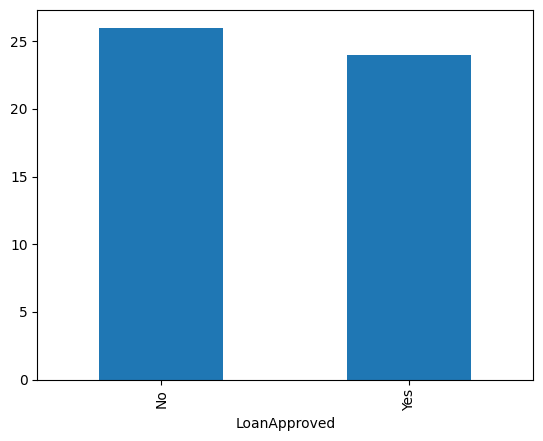

In [ ]:
print(df['LoanApproved'].value_counts().plot(kind='bar'))

Encoding of Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from pandas import get_dummies

In [ ]:
df=pd.get_dummies(df,columns=['LoanApproved'])
df.head()

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,LoanApproved_No,LoanApproved_Yes
0,1,45795,46606,771,0.27,True,False
1,2,30860,92313,362,0.65,True,False
2,3,133694,146699,438,0.00,False,True
3,4,149879,13792,798,0.35,True,False
4,5,140268,179073,691,0.30,False,True


In [ ]:
df=pd.read_csv("/content/loan_eligibility_dataset.csv")
df.head()
le=LabelEncoder()
df_encoded=df.apply(le.fit_transform)
df_encoded.head()

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,LoanApproved
0,0,7,16,35,10,0
1,1,1,27,7,26,0
2,2,42,39,12,0,1
3,3,49,2,39,13,0
4,4,45,45,28,11,1
